1. Setup & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('../data/benin-malanville.csv')
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


 2. Summary Stats & Nulls

In [2]:
df.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


In [3]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Comments    525600
dtype: int64

In [4]:
missing_pct = df.isnull().mean() * 100
missing_pct[missing_pct > 5]

Comments    100.0
dtype: float64

3. Outlier Detection

In [5]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = np.abs(zscore(df[columns_to_check]))
pd.DataFrame(z_scores > 3, columns=columns_to_check).sum()

GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64

4. Cleaning

In [6]:
df_clean = df.copy()

# Remove negatives
for col in ['GHI', 'DNI', 'DHI']:
    df_clean[col] = df_clean[col].apply(lambda x: max(x, 0))

# Wind fix
df_clean['WS'] = df_clean['WS'].replace(0, np.nan)
df_clean['WS'].fillna(df_clean['WS'].median(), inplace=True)

# Drop 'Comments' if present
if 'Comments' in df_clean.columns:
    df_clean.drop(columns=['Comments'], inplace=True)

# Fix types
df_clean['Cleaning'] = df_clean['Cleaning'].astype(bool)
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

# Save (do not commit)
df_clean.to_csv('../data/benin_clean.csv', index=False)

C:\Users\Alem The Kal\AppData\Local\Temp\ipykernel_17820\318408361.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['WS'].fillna(df_clean['WS'].median(), inplace=True)


 5. Visualizations
    - Time Series

d:\@kaim\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


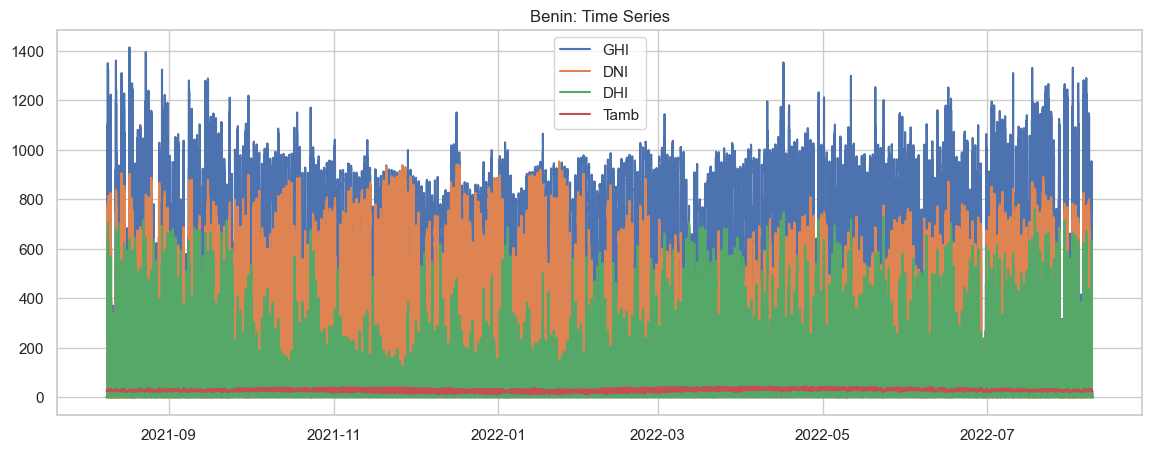

In [7]:
plt.figure(figsize=(14, 5))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df_clean['Timestamp'], df_clean[col], label=col)
plt.legend()
plt.title('Benin: Time Series')
plt.grid(True)
plt.show()

- Cleaning Impact

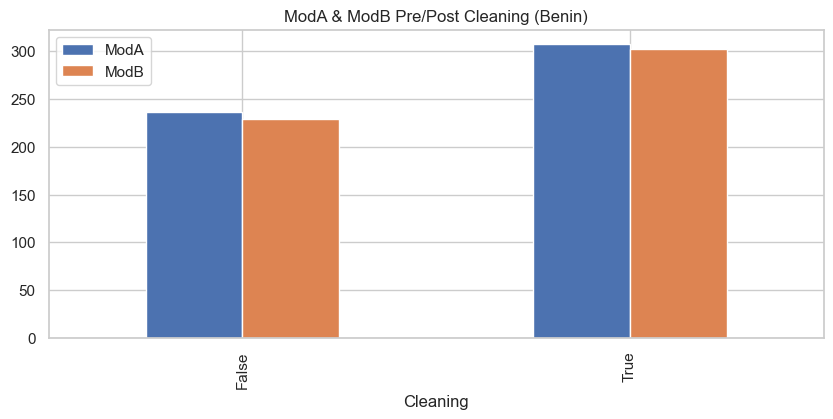

In [8]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', figsize=(10, 4))
plt.title('ModA & ModB Pre/Post Cleaning (Benin)')
plt.grid(True)
plt.show()

- Correlation Heatmap

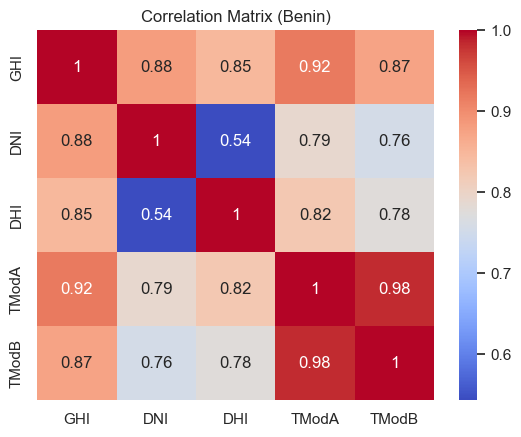

In [9]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Benin)')
plt.show()

# Scatter Plots

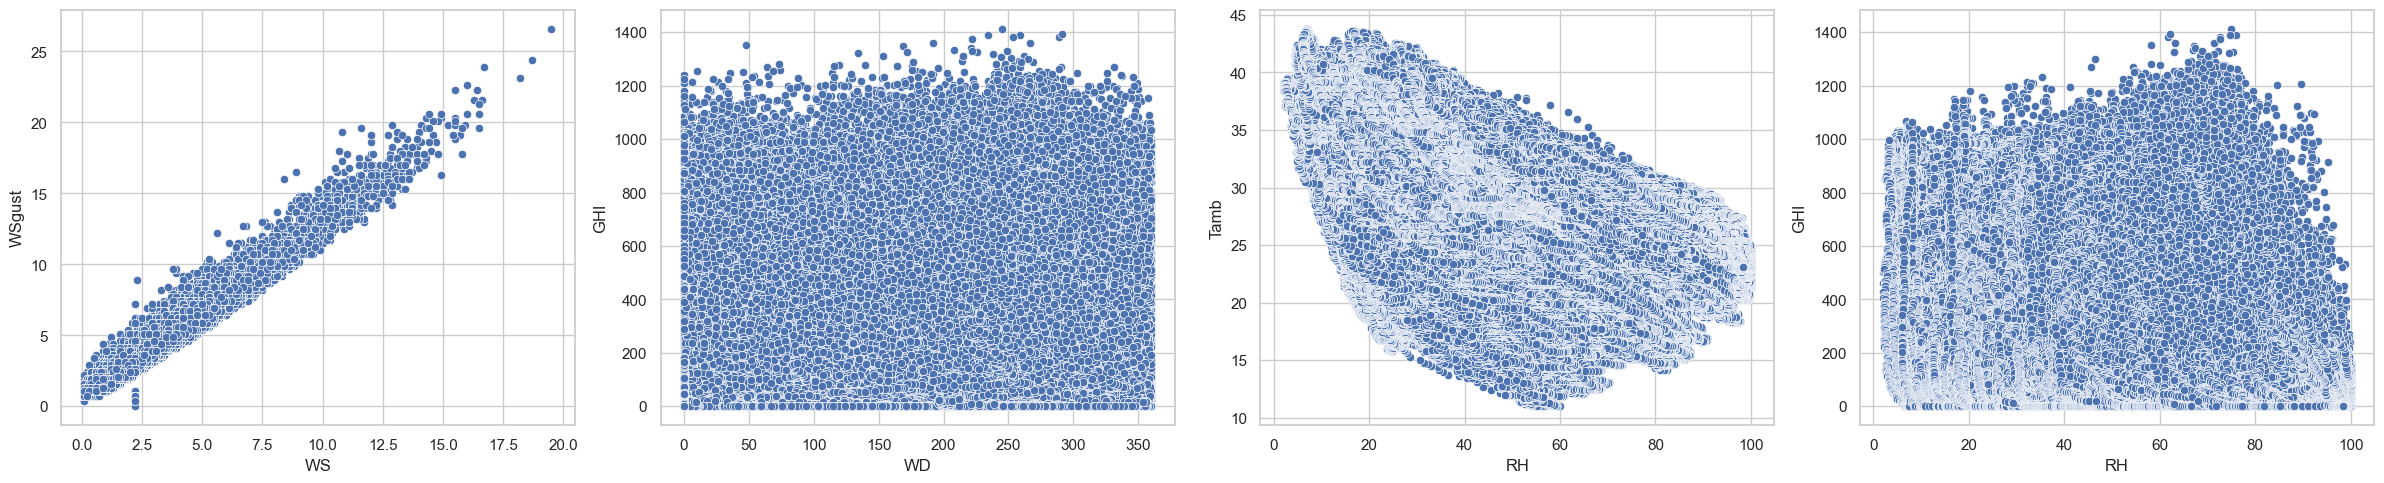

In [10]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))
sns.scatterplot(ax=axes[0], data=df_clean, x='WS', y='WSgust')
sns.scatterplot(ax=axes[1], data=df_clean, x='WD', y='GHI')
sns.scatterplot(ax=axes[2], data=df_clean, x='RH', y='Tamb')
sns.scatterplot(ax=axes[3], data=df_clean, x='RH', y='GHI')
plt.tight_layout()
plt.show()

- Wind Rose (Polar Plot)

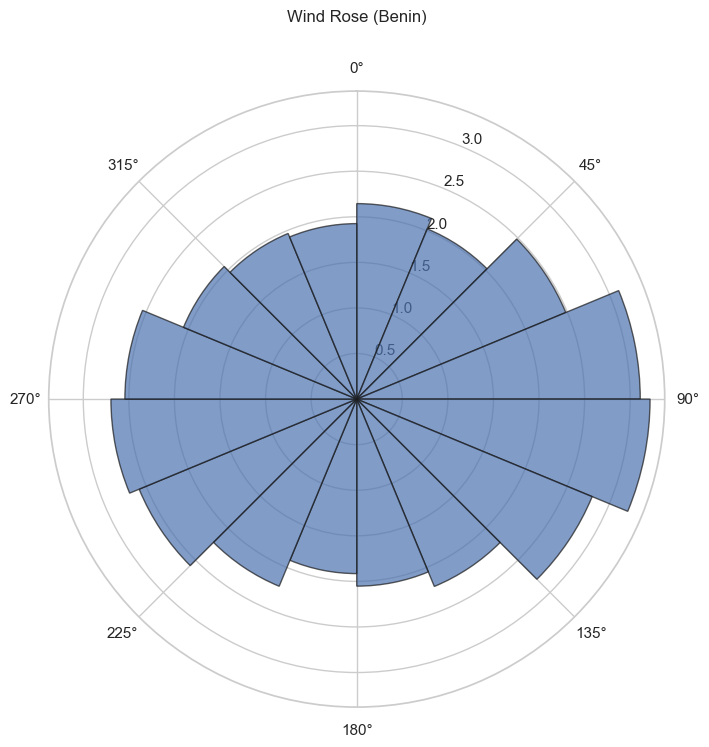

In [11]:
wd_rad = np.deg2rad(df_clean['WD'])
ws = df_clean['WS']
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
bins = np.linspace(0, 2 * np.pi, 17)
wd_bin = np.digitize(wd_rad, bins) - 1
ws_mean = [ws[wd_bin == i].mean() for i in range(len(bins)-1)]
bars = ax.bar(bins[:-1], ws_mean, width=(2 * np.pi / 16), align='edge', edgecolor='k', alpha=0.7)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title('Wind Rose (Benin)', y=1.1)
plt.show()

- Histograms

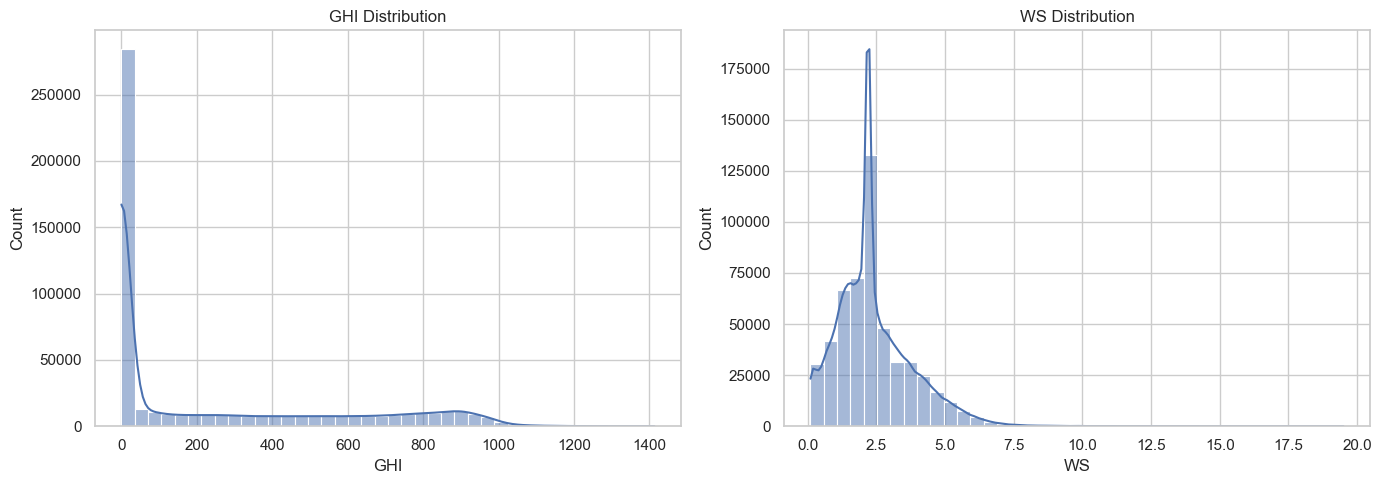

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_clean['GHI'], bins=40, kde=True, ax=axes[0])
sns.histplot(df_clean['WS'], bins=40, kde=True, ax=axes[1])
axes[0].set_title('GHI Distribution')
axes[1].set_title('WS Distribution')
plt.tight_layout()
plt.show()

- Bubble Chart

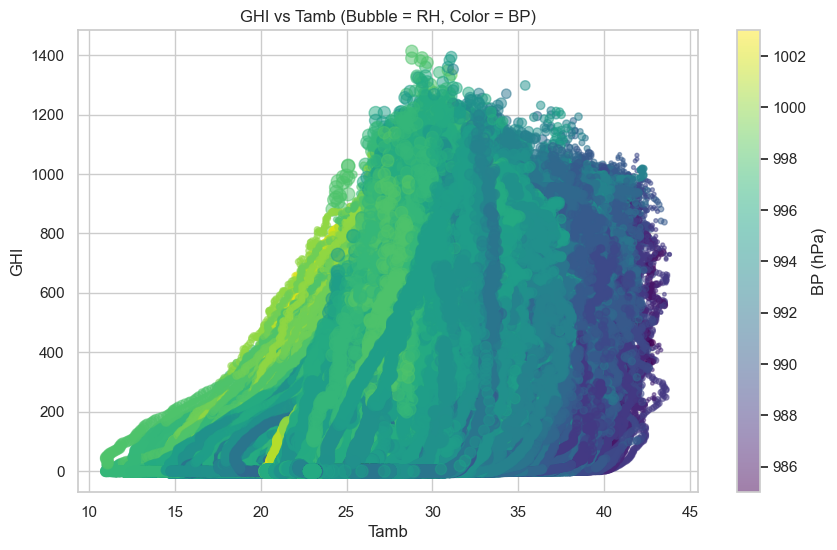

In [13]:
plt.figure(figsize=(10, 6))
bubble = plt.scatter(
    df_clean['Tamb'], df_clean['GHI'],
    s=df_clean['RH'], alpha=0.5, c=df_clean['BP'], cmap='viridis'
)
plt.colorbar(bubble, label='BP (hPa)')
plt.title('GHI vs Tamb (Bubble = RH, Color = BP)')
plt.xlabel('Tamb')
plt.ylabel('GHI')
plt.grid(True)
plt.show()